In [1]:
matplotlib notebook

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import random
from scipy.stats import sem 
import seaborn as sns
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = pd.read_csv ("data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")
mouse_drug_data_to_load.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_data_to_load.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:

# Combine the data into a single dataset
# Display the data table for preview
merged_df = pd.merge(clinical_trial_data_to_load,mouse_drug_data_to_load,on="Mouse ID")
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
MDF2 =pd.DataFrame(merged_df.columns[2:4])
MDF2

,0
0,Tumor Volume (mm3)
1,Metastatic Sites


In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#Calculate average tumor volume change over time for each drug
mean_tumor_volume = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean())

#Display DataFrame
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [8]:
#reformat the mean-tumor_volume data frame 
#Unstack function changes rows to columns
#if there are 2 different names level =0 puts 1 name on first row 
#level =1 puts column name in 2nd row
mean_tumor_volume = mean_tumor_volume.unstack(level = 0)

#Set column as only drug names
mean_tumor_volume.columns = mean_tumor_volume.columns.get_level_values(1)

#Display DataFrame
mean_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


## Tumor Response to Treatment

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
stderror_tumor_volume = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem())

# Preview DataFrame
stderror_tumor_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [10]:
# Minor Data Munging to Re-Format the Data Frames
#Set column as only drug names and Display DataFrame
stderror_tumor_volume = stderror_tumor_volume.unstack(level = 0)

stderror_tumor_volume.columns = stderror_tumor_volume.columns.get_level_values(1)

stderror_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


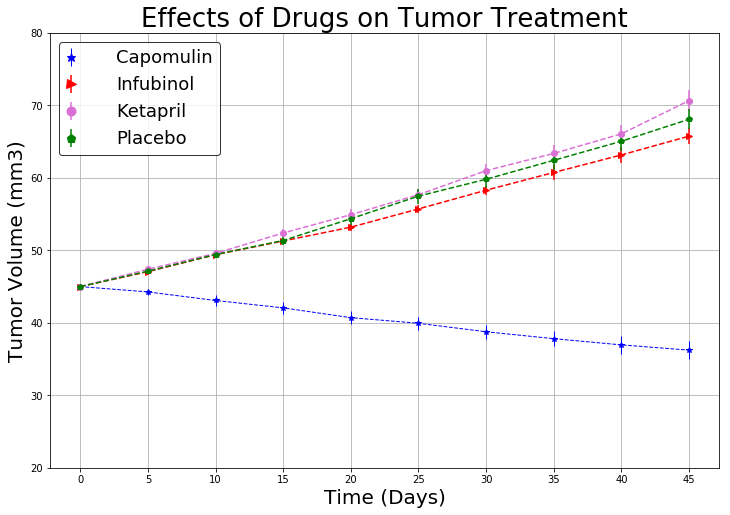

In [11]:
# Generate the Plot (with Error Bars)
# Save the Figure
#Set range of x-axis
x_axis = mean_tumor_volume.index

#Set size of scatter plots
plt.figure(figsize=(12,8))

#Create scatter plot for tumor response to "Capomulin"
plt.errorbar(x_axis, mean_tumor_volume["Capomulin"],yerr=stderror_tumor_volume["Capomulin"], 
             marker ="*",color = "blue",linestyle= "--",linewidth =1, label="Capomulin")
#Create scatter plot for tumor response to "Infubinol"
plt.errorbar(x_axis, mean_tumor_volume["Infubinol"],yerr=stderror_tumor_volume["Infubinol"], 
             marker =">",color = "red", linestyle= "--", label="Infubinol")
#Create scatter plot for tumor response to "Ketapril"
plt.errorbar(x_axis, mean_tumor_volume["Ketapril"],yerr=stderror_tumor_volume["Ketapril"], 
             marker ="o",color = "orchid", linestyle= "--", label="Ketapril")
#Create scatter plot for tumor response to "Placebo"
plt.errorbar(x_axis, mean_tumor_volume["Placebo"],yerr=stderror_tumor_volume["Placebo"],
             marker ="p",color="green", linestyle= "--", label="Placebo")

#Aesthetics 
plt.title("Effects of Drugs on Tumor Treatment", fontsize=26)
plt.xlabel("Time (Days)", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)
plt.xticks(np.arange(0, mean_tumor_volume.index.max()+5, 5))
plt.yticks(np.arange(20, 90, 10))

#Add legend
legend = plt.legend(numpoints= 1.5, 
                    markerscale= 1.5, 
                    fontsize= 18, 
                    frameon=True, 
                    edgecolor="black")

plt.grid()
plt.show()
plt.savefig("../Images/lineconfig.png")

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
#Metastasis is a pathogenic agent's spread from an initial or primary site to a different site within the host's body;
#it is typically spoken of as such spread by a cancerous tumor. 
#The newly pathological sites, then, are metastases

In [13]:
Mean_Met = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean())
# Convert to DataFrame
#Display DataFrame
Mean_Met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [14]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Met = Mean_Met.unstack(level = 0)
#Mean_Met.columns = Stderror_Met.columns.get_level_values(1)
# Preview that Reformatting worked
Mean_Met.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [19]:
stderror_Met = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem())
# Convert to DataFrame
#Display DataFrame
stderror_Met.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [16]:
# Minor Data Munging to Re-Format the Data Frames
stderror_Met = stderror_Met.unstack(level = 0)
stderror_Met.columns = stderror_Met.columns.get_level_values(1)
# Preview that Reformatting worked
stderror_Met.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
Mouse_Count = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Mouse ID"].count())

Mouse_Count.head()



Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [21]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
Mouse_Count = Mouse_Count.unstack(level=0)
Mouse_Count.columns = Mouse_Count.columns.get_level_values(1)
Mouse_Count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [ ]:
# Generate the Plot (Accounting for percentages)


# Save the Figure

# Show the Figure
#plt.show()

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug
#'dict.copy'gets the values of the original dictionary
#A shallow copy constructs a new object, while an assignment will simply point the new variable at the existing object.
percentage_change = Mouse_Count.copy()
percentage_change = round(percentage_change.apply(lambda c: c / c.max()) * 100)
# Display the data to confirm
percentage_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.0,92.0,73.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,69.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.0,84.0,62.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,35.0,80.0,46.0,56.0


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure

#fig.show()

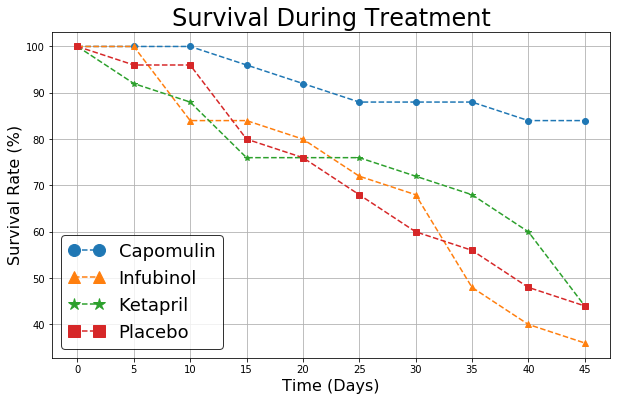

In [23]:

#Set range of x-axis
x_axis = percentage_change.index

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot for percentage of survival rate for mice on "Capomulin"
plt.errorbar(x_axis, percentage_change["Capomulin"], marker ="o", linestyle= "--", label="Capomulin")
#Create scatter plot for percentage of survival rate for mice on "Infubinol"
plt.errorbar(x_axis, percentage_change["Infubinol"], marker ="^", linestyle= "--", label="Infubinol")
#Create scatter plot for percentage of survival rate for mice on "Ketapril"
plt.errorbar(x_axis, percentage_change["Ketapril"], marker ="*", linestyle= "--", label="Ketapril")
#Create scatter plot for percentage of survival rate for mice on "Placebo"
plt.errorbar(x_axis, percentage_change["Placebo"], marker ="s", linestyle= "--", label="Placebo")

#Aesthetics 
plt.title("Survival During Treatment", fontsize=24)
plt.xlabel("Time (Days)", fontsize=16)
plt.ylabel("Survival Rate (%)", fontsize=16)
plt.xticks(np.arange(0, 50, 5))
plt.yticks(np.arange(40, 110, 10))

#Add legend
legend = plt.legend(loc = "best", 
                    numpoints= 2, 
                    markerscale= 2, 
                    fontsize= 18, 
                    frameon=True, 
                    edgecolor="black")

plt.grid()
plt.show()

In [24]:
total_tumor_growth =(((mean_tumor_volume.iloc[-1] - mean_tumor_volume.iloc[0]) / mean_tumor_volume.iloc[0]) * 100).to_frame("% Change")
total_tumor_growth

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


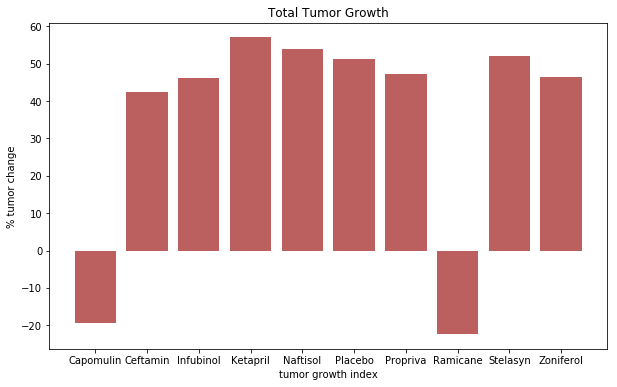

In [25]:
#Set range of x-axis
x_axis = total_tumor_growth.index
y_axis = total_tumor_growth["% Change"]

#Set size of scatter plots
plt.figure(figsize=(10,6)) 
plt.title("Total Tumor Growth")
plt.xlabel("tumor growth index")
plt.ylabel("% tumor change")
plt.bar(x_axis, y_axis,facecolor="brown",alpha = 0.75,align ="center")
plt.show()


In [ ]:
OBSERVATIONS 
1.Capomulin and Ramicane had a negative effect on tumor Growth 
2.Ketapril had the best results on tumor growth in the shortest possible time 
3.Placebo had a net positive effect on tumor growth is is interesting since its not an actual drug 